Sarcasm Tone Feature Extraction
---
Source: [Audio Deep Learning Made Simple: Sound Classification, Step-by-Step | by Ketan Doshi | Towards Data Science](https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5#:~:text=Audio%20Classification,-Just%20like%20classifying&text=We%20will%20start%20with%20sound,to%20which%20the%20sound%20belongs.&text=There%20are%20many%20suitable%20datasets%20available%20for%20sounds%20of%20different%20types.)

Data Pre-processing
---

In [1]:
import pandas as pd
from pathlib import Path
import os

#Load the metadata file
model_data = 'Sarcasm_Model_Dataset.csv'
model_df = pd.read_csv('Sarcasm_Model_Dataset.csv')
model_df.head()

#Extract relevant columns
tone_df = model_df[['tone', 'sarcasm']]
tone_df.head()

,tone,sarcasm
0,1_60.wav,True
1,1_70.wav,True
2,1_175.wav,True
3,1_182.wav,True
4,1_276.wav,True


Read and Load the .wav audio files
---
Source: [Pre-Processing of Audio Data](https://medium.com/aiskunks/pre-processing-of-audio-data-e99718830e67)

In [9]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio


audio_array = []
sample_rate = 44100
max_length = 10*sample_rate
audio_file_path = 'audio_data'

for filename in os.listdir(audio_file_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(audio_file_path, filename)
        # Load the audio file using librosa.load() and append the array to the list
        x, sr = librosa.load(file_path, sr=sample_rate)  #standardize sample rate (samples/sec) to 44100Hz
        if len(x) > max_length:
            x = x[:max_length]
        else:
            x = np.pad(x, (0, max_length - len(x)), mode='constant')
        audio_array.append(x)

# Pad audio arrays to the length of the longest audio file
padded_audio_arrays = []
for audio in audio_array:
    padded_audio_array = np.pad(audio, (0, max_length - len(audio)), mode='constant')
    padded_audio_arrays.append(padded_audio_array)

# Convert the list of padded audio arrays to a NumPy array
wav_array = np.array(audio_array)

##### Librosa Example #####
#x, sr = librosa.load('audio_data/1_1001.wav', sr=44100)   # x = numpy array of audio time series, sr = the sample rate (default 22KHZ)
#print(x.shape, sr)
#print(type(x), type(sr))
        
##### Plot waveform #####
#plt.figure(figsize=(14, 5))
#librosa.display.waveshow(x, sr=sr)
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.show()

##### Play the audio #####
#Audio(x, rate=sr)

Convert audio files to mel spectrograms
---

In [10]:
spectrograms = []

for wav in wav_array:
    spectrogram = librosa.feature.melspectrogram(y=wav, sr=sample_rate)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)  #converts from power (energy) scale to decibel scale
    spectrograms.append(spectrogram_db)

# Convert the list of spectrograms to a NumPy array
spectrograms_nparray = np.array(spectrograms)
#print("Shape of spectrograms array:", spectrograms_nparray.shape)

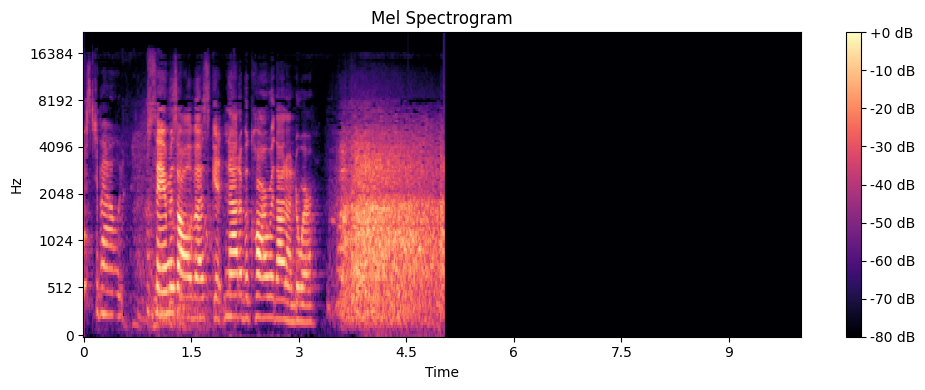

In [12]:
# Display spectrogram
#plt.figure(figsize=(10, 4))
#librosa.display.specshow(spectrograms_nparray[7], sr=sample_rate, x_axis='time', y_axis='mel')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Mel Spectrogram')
#plt.tight_layout()
#plt.show()